
# Comprehensive Model Optimization

This notebook optimizes all models used in the training phase. For each model, we:
1. Perform hyperparameter tuning using GridSearchCV.
2. Evaluate the optimized models compared to the default models.
3. Visualize results, including performance metrics and confusion matrices.


In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("../data/processed/scaled_results/Employee_MedianMode_imputed_standard_scaled.csv")

X = data.drop(columns=['LeaveOrNot'])
y = data['LeaveOrNot'].astype(int)

def manual_train_test_split(X, y, test_size=0.2, random_state=10):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]
    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]

X_train, X_test, y_train, y_test = manual_train_test_split(X, y, test_size=0.2, random_state=10)


In [14]:
optimized_results = {}

# Logistic Regression
logistic_grid = {'C': [0.01, 0.1, 1, 10, 100]}
logistic_search = GridSearchCV(
    LogisticRegression(random_state=10), param_grid=logistic_grid, scoring='f1', cv=3
)
logistic_search.fit(X_train, y_train)
optimized_results['Logistic Regression'] = logistic_search.best_params_

In [15]:
# Random Forest
rf_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_search = GridSearchCV(
    RandomForestClassifier(random_state=10), param_grid=rf_grid, scoring='f1', cv=3
)
rf_search.fit(X_train, y_train)
optimized_results['Random Forest'] = rf_search.best_params_

In [16]:
# SVM
svm_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_search = GridSearchCV(
    SVC(random_state=10), param_grid=svm_grid, scoring='f1', cv=3
)
svm_search.fit(X_train, y_train)
optimized_results['SVM'] = svm_search.best_params_

In [17]:
# XGBoost
xgb_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9]
}
xgb_search = GridSearchCV(
    XGBClassifier(random_state=10, eval_metric='logloss'),
    param_grid=xgb_grid, scoring='f1', cv=3
)
xgb_search.fit(X_train, y_train)
optimized_results['XGBoost'] = xgb_search.best_params_

/Users/kbojan/Studia/Magisterka/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:12:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kbojan/Studia/Magisterka/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:12:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kbojan/Studia/Magisterka/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:12:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/kbojan/Studia/Magisterka/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:12:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" 

In [18]:
# LightGBM
lgbm_grid = {
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200]
}
lgbm_search = GridSearchCV(
    LGBMClassifier(random_state=10), param_grid=lgbm_grid, scoring='f1', cv=3
)
lgbm_search.fit(X_train, y_train)
optimized_results['LightGBM'] = lgbm_search.best_params_

print("Optimized Hyperparameters:")
for model, params in optimized_results.items():
    print(f"{model}: {params}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 750, number of negative: 1732
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 53
[LightGBM] [Info] Number of data points in the train set: 2482, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.302176 -> initscore=-0.836959
[LightGBM] [Info] Start training from score -0.836959
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 749, number of negative: 1733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=t

In [19]:

baseline_models = {
    "Logistic Regression": LogisticRegression(random_state=10),
    "Random Forest": RandomForestClassifier(random_state=10),
    "SVM": SVC(random_state=10),
    "XGBoost": XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=10)
}

optimized_models = {
    "Logistic Regression": logistic_search.best_estimator_,
    "Random Forest": rf_search.best_estimator_,
    "SVM": svm_search.best_estimator_,
    "XGBoost": xgb_search.best_estimator_,
    "LightGBM": lgbm_search.best_estimator_
}

baseline_results = {}
optimized_results = {}

for name, model in baseline_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='binary')
    baseline_results[name] = {"Accuracy": accuracy, "F1 Score": f1}

for name, model in optimized_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='binary')
    optimized_results[name] = {"Accuracy": accuracy, "F1 Score": f1}

baseline_df = pd.DataFrame(baseline_results).T
optimized_df = pd.DataFrame(optimized_results).T

/Users/kbojan/Studia/Magisterka/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:13:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1124, number of negative: 2599
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 3723, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.301907 -> initscore=-0.838233
[LightGBM] [Info] Start training from score -0.838233


In [20]:
from tabulate import tabulate

print("Baseline results:\n")
print(tabulate(baseline_df, headers="keys", tablefmt="pretty"))

print("\nOptimized results:\n")
print(tabulate(optimized_df, headers="keys", tablefmt="pretty"))

Baseline results:

+---------------------+--------------------+--------------------+
|                     |      Accuracy      |      F1 Score      |
+---------------------+--------------------+--------------------+
| Logistic Regression | 0.7741935483870968 | 0.5643153526970954 |
|    Random Forest    | 0.867741935483871  | 0.7775768535262206 |
|         SVM         | 0.8698924731182796 | 0.7677543186180422 |
|       XGBoost       | 0.8655913978494624 | 0.7739602169981917 |
|      LightGBM       | 0.8763440860215054 | 0.7858472998137802 |
+---------------------+--------------------+--------------------+

Optimized results:

+---------------------+--------------------+--------------------+
|                     |      Accuracy      |      F1 Score      |
+---------------------+--------------------+--------------------+
| Logistic Regression | 0.7741935483870968 | 0.5643153526970954 |
|    Random Forest    | 0.8806451612903226 | 0.7917448405253283 |
|         SVM         | 0.8784946236

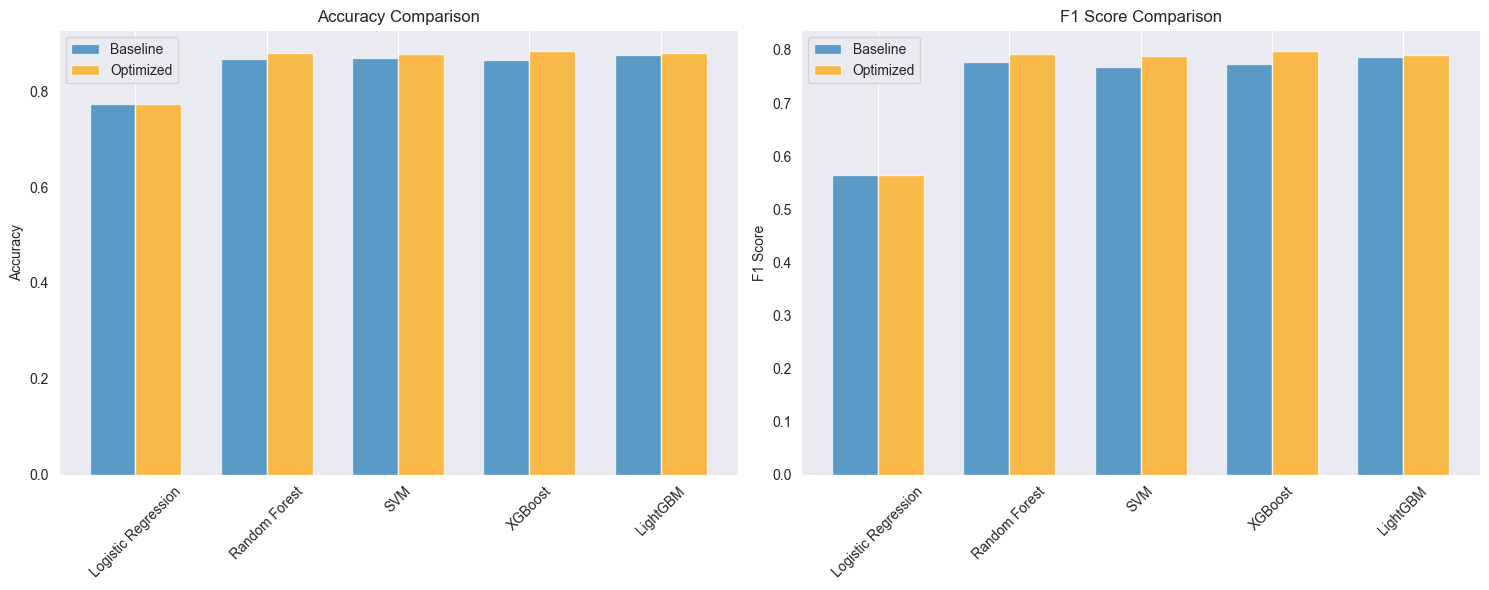

In [21]:
import numpy as np
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'F1 Score']

def plot_comparison(baseline_df, optimized_df):
    x = np.arange(len(baseline_df))
    width = 0.35

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    for i, metric in enumerate(metrics):
        baseline_values = baseline_df[metric]
        optimized_values = optimized_df[metric]

        axes[i].bar(x - width/2, baseline_values, width, label='Baseline', alpha=0.7)
        axes[i].bar(x + width/2, optimized_values, width, label='Optimized', alpha=0.7, color='orange')

        axes[i].set_title(f"{metric} Comparison")
        axes[i].set_ylabel(metric)
        axes[i].set_xticks(x)
        axes[i].set_xticklabels(baseline_df.index, rotation=45)
        axes[i].legend()
        axes[i].grid(axis='y')

    plt.tight_layout()
    plt.show()

plot_comparison(baseline_df, optimized_df)

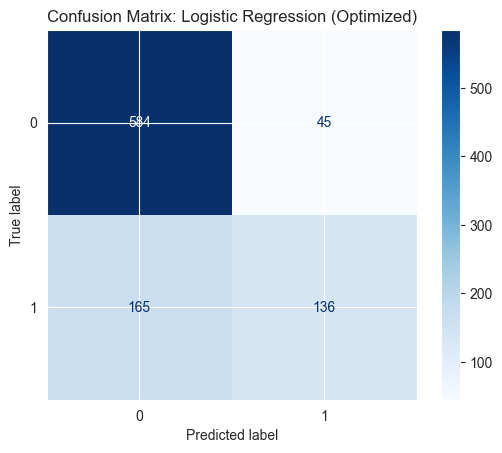

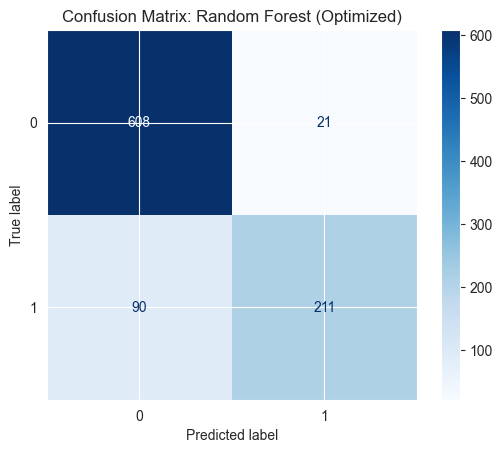

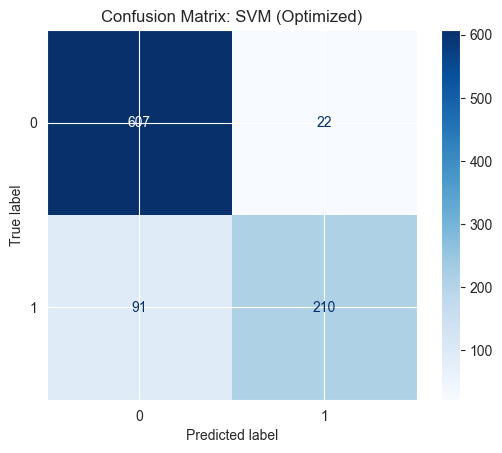

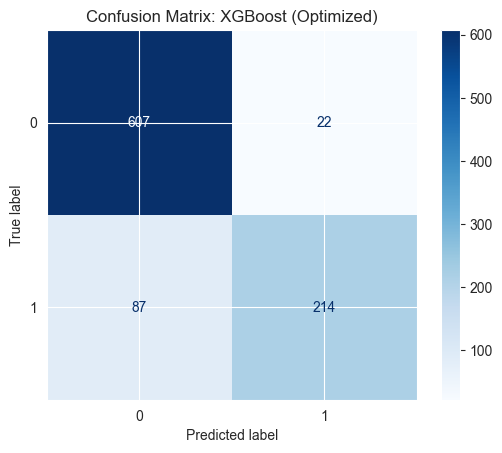

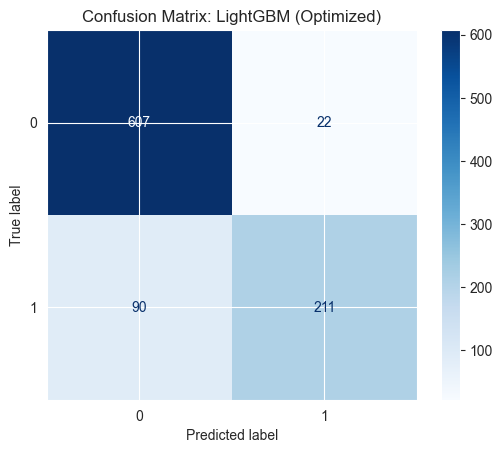

In [22]:
def plot_confusion_matrices(optimized_models, X_test, y_test):
    for name, model in optimized_models.items():
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        disp.plot(cmap='Blues')
        plt.title(f"Confusion Matrix: {name} (Optimized)")
        plt.show()

plot_confusion_matrices(optimized_models, X_test, y_test)